A cute little demo showing the simplest usage of minGPT. Configured to run fine on Macbook Air in like a minute.

In [ ]:
LIVE EVENT DATE:  June 22, 2023
LIVE EVENT TIME:  10:00 AM EDT
Use the link below to enter the event up to 15 minutes before the start.

EVENT LINK:  https://event.on24.com/wcc/r/4260101/F8F2647006EDBE0A5632E6617E76E912?mode=login&email=sungwoo77.hong@samsung.com
EMAIL:  sungwoo77.hong@samsung.com

In [ ]:
https://vimeo.com/839749267?mkt_tok=Nzg2LVpLVC0wNjQAAAGMmV74AV4JQUw05my6iXG-OurZBor4oTo--v84QvljrL9kHdKutE7FYu5Zkamp-2MyPWdf56ih_dWSsYzFq0VIPUeJxpG5z59Xzmu7L0J9sQjj

In [1]:
pip install fredapi pandas


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

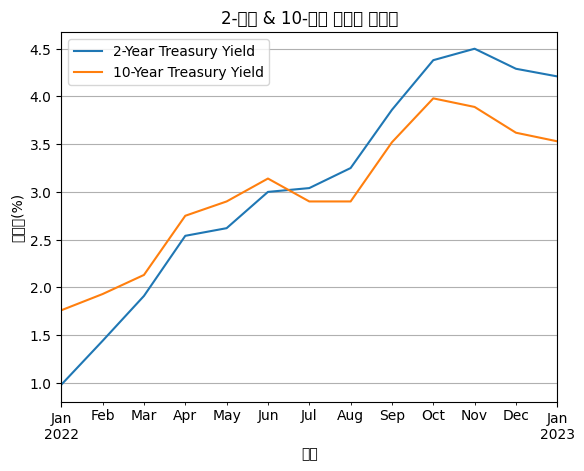

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# 발급받은 FRED API 키 입력
api_key = '3c0c2ffd112a54824dd4fdeb5354738f'
fred = Fred(api_key=api_key)

# 2년물 미국채 및 10년물 미국채 코드 (FRED에서 제공하는 시리즈 코드)
two_year_treasury = 'GS2'
ten_year_treasury = 'GS10'

# 원하는 날짜 범위 설정(YYYY-MM-DD 형식)
start_date = '2022-01-01'
end_date = '2023-01-01'

# 데이터 불러오기
two_year_data = fred.get_series(two_year_treasury, start_date, end_date)
ten_year_data = fred.get_series(ten_year_treasury, start_date, end_date)

# 데이터 병합
data = pd.concat([two_year_data, ten_year_data], axis=1)
data.columns = ['2-Year Treasury Yield', '10-Year Treasury Yield']

# 그래프 그리기
data.plot(title='2-년물 & 10-년물 미국채 수익률', grid=True)
plt.xlabel('날짜')
plt.ylabel('수익률(%)')
plt.show()


In [2]:
!pip install finance-datareader
!pip install statsmodels


In [3]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests


In [5]:
start_date = '2020-01-01'
end_date = '2023-07-14'

# 삼성전자 (종목 코드: 005930)과 코스피 (종목 코드: KOSPI) 데이터를 가져옵니다.
# 수정 종가를 사용하여 수익률을 계산하도록 선택합니다.
samsung = fdr.DataReader('005930', start=start_date, end=end_date)['Close']
kospi = fdr.DataReader('KS11', start=start_date, end=end_date)['Close']


In [6]:
# 수익률 계산
samsung_returns = samsung.pct_change().dropna()
kospi_returns = kospi.pct_change().dropna()


In [8]:
# 데이터 프레임 생성
data = pd.concat([samsung_returns, kospi_returns], axis=1).dropna()
data.columns = ['Samsung', 'KOSPI']

# 그레인저 인과관계 검정 수행 (최대 2차 지연을 고려하겠습니다.)
max_lag = 2
results = grangercausalitytests(data, max_lag)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.5538 , p=0.0002  , df_denom=868, df_num=1
ssr based chi2 test:   chi2=13.6007 , p=0.0002  , df=1
likelihood ratio test: chi2=13.4956 , p=0.0002  , df=1
parameter F test:         F=13.5538 , p=0.0002  , df_denom=868, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.8896 , p=0.0000  , df_denom=865, df_num=2
ssr based chi2 test:   chi2=29.9513 , p=0.0000  , df=2
likelihood ratio test: chi2=29.4473 , p=0.0000  , df=2
parameter F test:         F=14.8896 , p=0.0000  , df_denom=865, df_num=2


In [9]:
pip install yfinance pandas


In [10]:
import yfinance as yf
import pandas as pd

# 데이터를 다운로드합니다.
ticker = 'TSLA'
start_date = '2020-01-01'
end_date = '2023-07-14'
data = yf.download(ticker, start=start_date, end=end_date)

# 20일 이동 평균 및 전고점/전저점을 계산합니다.
n = 20
data['High Rolling'] = data['High'].rolling(window=n).max()
data['Low Rolling'] = data['Low'].rolling(window=n).min()

# 채널 돌파를 판단합니다.
data['Buy'] = data['Close'] > data['High Rolling'].shift(1)
data['Sell'] = data['Close'] < data['Low Rolling'].shift(1)

# 결과 출력합니다.
print(data[['Close', 'High Rolling', 'Low Rolling', 'Buy', 'Sell']])


[*********************100%***********************]  1 of 1 completed
                 Close  High Rolling  Low Rolling    Buy   Sell
Date                                                           
2020-01-02   28.684000           NaN          NaN  False  False
2020-01-03   29.534000           NaN          NaN  False  False
2020-01-06   30.102667           NaN          NaN  False  False
2020-01-07   31.270666           NaN          NaN  False  False
2020-01-08   32.809334           NaN          NaN  False  False
...                ...           ...          ...    ...    ...
2023-07-07  274.429993        284.25   223.009995  False  False
2023-07-10  269.609985        284.25   240.699997  False  False
2023-07-11  269.790009        284.25   240.699997  False  False
2023-07-12  271.989990        284.25   240.699997  False  False
2023-07-13  277.899994        284.25   240.699997  False  False

[888 rows x 5 columns]


In [12]:
!pip install pandas pandas_datareader matplotlib

[*********************100%***********************]  1 of 1 completed


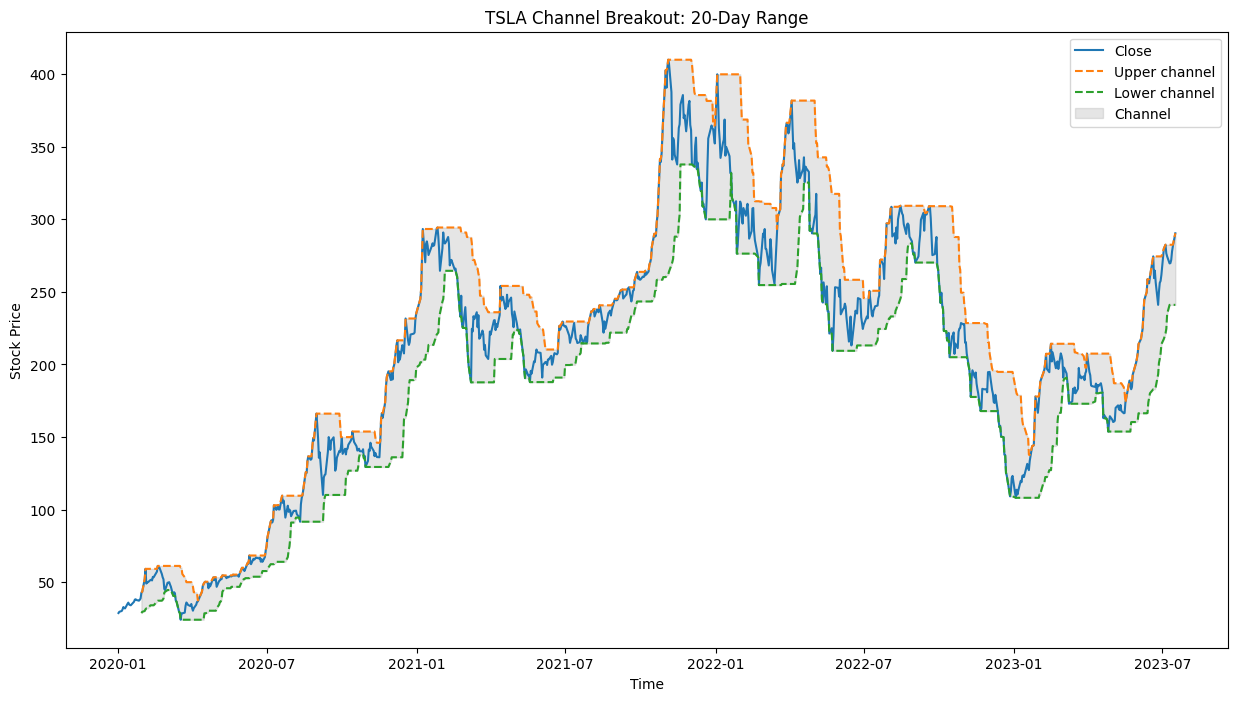

In [14]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

# 테슬라 주가 데이터 다운로드
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime.now()
ticker = "TSLA"
#df = web.get_data_yahoo(ticker, start_date, end_date)
df = yf.download(ticker, start=start_date, end=end_date)

# 채널 기간 설정 및 상한가/하한가 계산
channel_period = 20
df["Upper"] = df["Close"].rolling(window=channel_period).max()
df["Lower"] = df["Close"].rolling(window=channel_period).min()

# 그래프 그리기

plt.figure(figsize=(15, 8))
plt.plot(df["Close"], label="Close")
plt.plot(df["Upper"], label="Upper channel", linestyle="dashed")
plt.plot(df["Lower"], label="Lower channel", linestyle="dashed")

plt.fill_between(df.index, df["Lower"], df["Upper"], color="gray", alpha=0.2, label="Channel")

plt.title(f"{ticker} Channel Breakout: {channel_period}-Day Range")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import requests
from lxml import html
from tqdm import tqdm

In [ ]:
# 삼성전자
sample_code = '005930'

In [ ]:
# parsing URL
# 우리 컴퓨터 -> [접속] -> 에프앤가이드(Data Source) -> [크롤링/웹 스크래핑] -> 우리 컴퓨터
# client -> request -> [Server] -> response -> client

SNAP_URL = 'https://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode=A{}&cID=&MenuYn=Y&ReportGB=&NewMenuID=101&stkGb=701'
RATIO_URL = 'https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A{}&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701'


In [ ]:
# object -> 데이터 덩어리(추상화)

snap_url = SNAP_URL.format(sample_code)
snap_content = requests.get(snap_url).content # 문자열 binary
snap_tree = html.fromstring(snap_content) # 객체(object)
per = snap_tree.xpath('//*[@id="corp_group2"]/dl[1]/dd')[0].text
per = float(per)

In [ ]:
per

8.15

In [ ]:
ratio_url = RATIO_URL.format(sample_code)
ratio_content = requests.get(ratio_url).content
ratio_tree = html.fromstring(ratio_content)
debt_ratio = ratio_tree.xpath('//*[@id="p_grid1_3"]/td[5]')[0].text
debt_ratio = float(debt_ratio)

In [ ]:
# stockMkt => KOSPI
# kosdaqMkt => KOSDAQ
# konexMkt => KONEX

In [ ]:
def get_stock_list(market):
    market_code = ''
    if market == 'kospi':
        market_code = 'stockMkt'
    elif market == 'kosdaq':
        market_code = 'kosdaqMkt'
    elif market == 'konex':
        market_code = 'konexMkt'
    kind_url = 'https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&pageIndex=1&currentPageSize=3000&comAbbrv=&beginIndex=&orderMode=3&orderStat=D&isurCd=&repIsuSrtCd=&searchCodeType=&marketType={}&searchType=13&industry=&fiscalYearEnd=all&comAbbrvTmp=&location=all'.format(market_code)

    return pd.read_html(kind_url, converters={'종목코드':lambda x: str(x)})[0]


In [ ]:
def converter(x):
    return str(x)

# 람다 함수 == 무명(anonymous) 함수 == 일회용 함수
lambda x: str(x)

<function __main__.<lambda>(x)>

In [ ]:
kospi_df = get_stock_list('kospi')
print(kospi_df.shape)

(829, 9)


In [ ]:
kosdaq_df = get_stock_list('kosdaq')
print(kosdaq_df.shape)

(1632, 9)


In [ ]:
# merge -> SQL Join
# append | kospi_df.append([kosdaq_df])
# concatenate(합치다)
stock_list_df = pd.concat([kospi_df, kosdaq_df] )

In [ ]:
print(stock_list_df.shape)

(2461, 9)


In [ ]:
# stock_list_df['종목코드'].dropna()
stock_list_df = stock_list_df[stock_list_df['종목코드'].notnull()]

In [ ]:
stock_list_df = stock_list_df[~stock_list_df['회사명'].str.contains('스팩|리츠')]
print(stock_list_df.shape)

(2364, 9)


In [ ]:
# list comprehension
stock_list_df.index = [x for x in range(len(stock_list_df))]

In [ ]:
stock_list_df.to_csv('kospi_kosdaq_stock_list.csv', encoding='utf-8', index=True)

In [ ]:
code_list = stock_list_df['종목코드']
code_list

0       100090
1       453340
2       452260
3       450140
4       377740
         ...  
2359    013030
2360    019550
2361    019570
2362    019590
2363    006920
Name: 종목코드, Length: 2364, dtype: object

In [ ]:
sample_df = pd.DataFrame(
    {'005930':['삼성전자', 1, 2], '035720':['카카오', 1, 2], '015720':['카카오', 1, 2], '025720':['카카오', 1, 2]}
).transpose()



In [ ]:
sample_df.columns = ['name', 'PER', 'Debt_ratio']

In [ ]:
sample_df

,name,PER,Debt_ratio
005930,삼성전자,1,2
035720,카카오,1,2
015720,카카오,1,2
025720,카카오,1,2


In [ ]:
def FinanceInfoCrawler(li, df):
    result_dict = {}
    error_codes = []

    for code in tqdm(li):
        try:
            # Parsing URL setting
            SNAP_URL = 'https://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode=A{}&cID=&MenuYn=Y&ReportGB=&NewMenuID=101&stkGb=701'
            RATIO_URL = 'https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A{}&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701'

            # company name
            company_name = df[df['종목코드'] == code]['회사명'].values[0]

            # Get PER
            snap_url = SNAP_URL.format(code)
            snap_content = requests.get(snap_url).content
            snap_tree = html.fromstring(snap_content)
            per = snap_tree.xpath('//*[@id="corp_group2"]/dl[1]/dd')[0].text
            per = float(per)

            # Get Debt ratio
            ratio_url = RATIO_URL.format(code)
            ratio_content = requests.get(ratio_url).content
            ratio_tree = html.fromstring(ratio_content)
            debt_ratio = ratio_tree.xpath('//*[@id="p_grid1_3"]/td[5]')[0].text
            debt_ratio = float(debt_ratio)

            result_dict[code] = [company_name, per, debt_ratio]

        except (TypeError, IndexError, AttributeError, ValueError):
            pass
#             print(code)
            error_codes.append(code)

    # convert dict to DataFrame
    result_df = pd.DataFrame(result_dict)

    # transpose DataFrame
    result_df = result_df.transpose()

    # Setting column names
    result_df.columns = ['Name', 'PER', 'Debt_ratio']

    return result_df, error_codes

In [ ]:
crawling_result_df = FinanceInfoCrawler(code_list[:50],stock_list_df)

100%|██████████| 50/50 [00:46<00:00,  1.07it/s]


In [ ]:
print(crawling_result_df[0].shape)
crawling_result_df[0].head()

(39, 3)


,Name,PER,Debt_ratio
100090,SK오션플랜트,38.11,132.0
377740,바이오노트,1.89,9.8
446070,유니드비티플러스,104.18,11.2
108320,LX세미콘,7.5,35.7
126720,수산인더스트리,6.3,24.7


In [ ]:
# original data
# crawling_result_df

# copy data
copy_df = crawling_result_df[0].copy()

In [ ]:
# PER 10 이하
# 부채비율 50 이하
# (상위) 20개 종목

final_result_df = copy_df[
    (copy_df['PER'] <= 10)&(copy_df['Debt_ratio'] <= 50)&(copy_df['PER'] > 0)
].sort_values(
    by='PER', ascending=True
).iloc[:20]


In [ ]:
import datetime

# 시간까지 포함한 날짜
now = datetime.datetime.now()

final_result_df.to_csv('LowPER_LowDR_{}.csv'.format(now.strftime('%Y%m%d')))

In [ ]:
pd.read_csv('LowPER_LowDR_{}.csv'.format(now.strftime('%Y%m%d')))

,Unnamed: 0,Name,PER,Debt_ratio
0,377740,바이오노트,1.89,9.8
1,137310,에스디바이오센서,2.39,10.7
2,383800,LX홀딩스,3.90,1.5
3,353200,대덕전자,6.16,39.4
4,363280,티와이홀딩스,6.17,47.6
5,126720,수산인더스트리,6.30,24.7
6,108320,LX세미콘,7.50,35.7
